In [10]:
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('csv_files/train.csv')
train = train.drop(labels=['OutcomeSubtype', 'DateTime', 'AnimalID'], axis=1)

In [3]:
train['Adopted'] = ''

for rowcount in train.index:
    if train.OutcomeType[rowcount] == 'Return_to_owner' or train.OutcomeType[rowcount] == 'Adoption':
        train['Adopted'][rowcount] = 'Y'
    else:
        train['Adopted'][rowcount] = 'N'

In [4]:
y_n_dummies = pd.get_dummies(train.Adopted)

In [5]:
train = train.join(y_n_dummies)
train = train.drop(labels=['Adopted'], axis=1)

In [6]:
dogs = train[train.AnimalType == 'Dog']
dogs = dogs.dropna(subset=['Name', 'OutcomeType'])
cats = train[train.AnimalType == 'Cat']
cats = cats.dropna(subset=['Name', 'OutcomeType'])

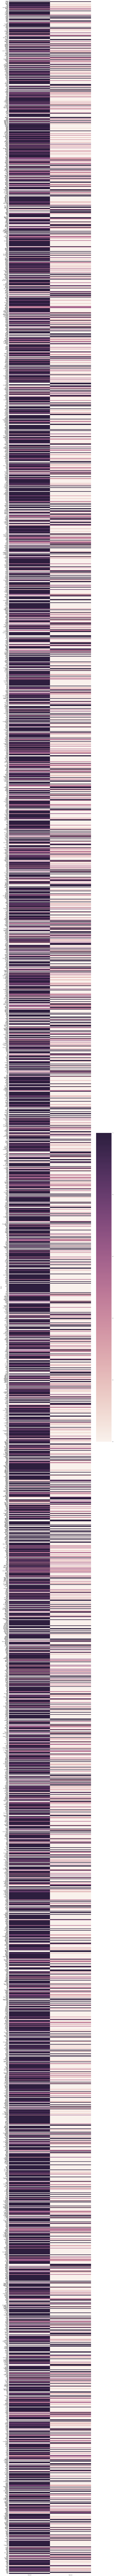

In [20]:
dogs_adopted_based_on_name = pd.pivot_table(dogs, index='Name', values=['Y', 'N'], aggfunc='sum')
dogs_adopted_based_on_name['Total'] = dogs_adopted_based_on_name.Y + dogs_adopted_based_on_name.N
dogs_adopted_based_on_name['Ypercent'] = dogs_adopted_based_on_name.Y/dogs_adopted_based_on_name.Total
dogs_adopted_based_on_name['Npercent'] = dogs_adopted_based_on_name.N/dogs_adopted_based_on_name.Total
dogs_adopted_based_on_name = dogs_adopted_based_on_name.drop(labels=['Y', 'N', 'Total'], axis=1)
plt.figure(figsize=(20,500))
sns.heatmap(dogs_adopted_based_on_name)

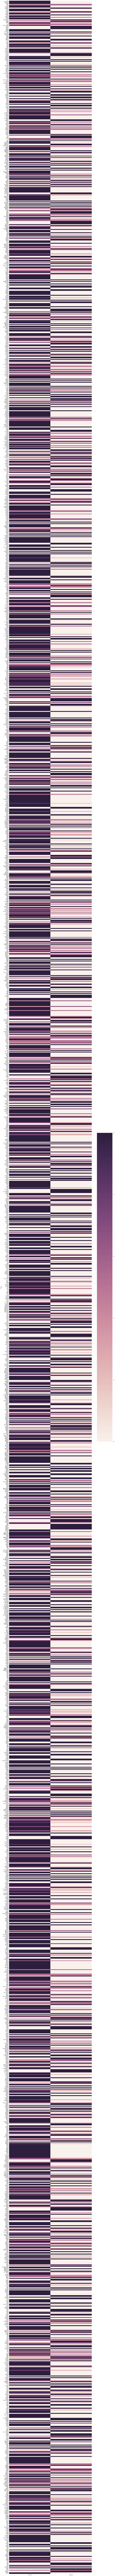

In [21]:
cats_adopted_based_on_name = pd.pivot_table(cats, index='Name', values=['Y', 'N'], aggfunc='sum')
cats_adopted_based_on_name['Total'] = cats_adopted_based_on_name.Y + cats_adopted_based_on_name.N
cats_adopted_based_on_name['Ypercent'] = cats_adopted_based_on_name.Y/cats_adopted_based_on_name.Total
cats_adopted_based_on_name['Npercent'] = cats_adopted_based_on_name.N/cats_adopted_based_on_name.Total
cats_adopted_based_on_name = cats_adopted_based_on_name.drop(labels=['Y', 'N', 'Total'], axis=1)
plt.figure(figsize=(20,500))
sns.heatmap(cats_adopted_based_on_name)